In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [ ]:
th=pd.read_csv('/content/thyroidDF.csv')
print(th.head())

   age sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick pregnant  \
0   29   F            f                  f                   f    f        f   
1   29   F            f                  f                   f    f        f   
2   41   F            f                  f                   f    f        f   
3   36   F            f                  f                   f    f        f   
4   32   F            f                  f                   f    f        f   

  thyroid_surgery I131_treatment query_hypothyroid  ...    TT4 T4U_measured  \
0               f              f                 t  ...    NaN            f   
1               f              f                 f  ...  128.0            f   
2               f              f                 f  ...    NaN            f   
3               f              f                 f  ...    NaN            f   
4               f              f                 f  ...    NaN            f   

  T4U FTI_measured FTI TBG_measured   TBG  r

In [ ]:
print(th.duplicated().sum())  #checking duplicate value

0


In [ ]:
th.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'target', 'patient_id'],
      dtype='object')

In [ ]:
th.shape

(9172, 31)

In [ ]:
th.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

<Axes: >

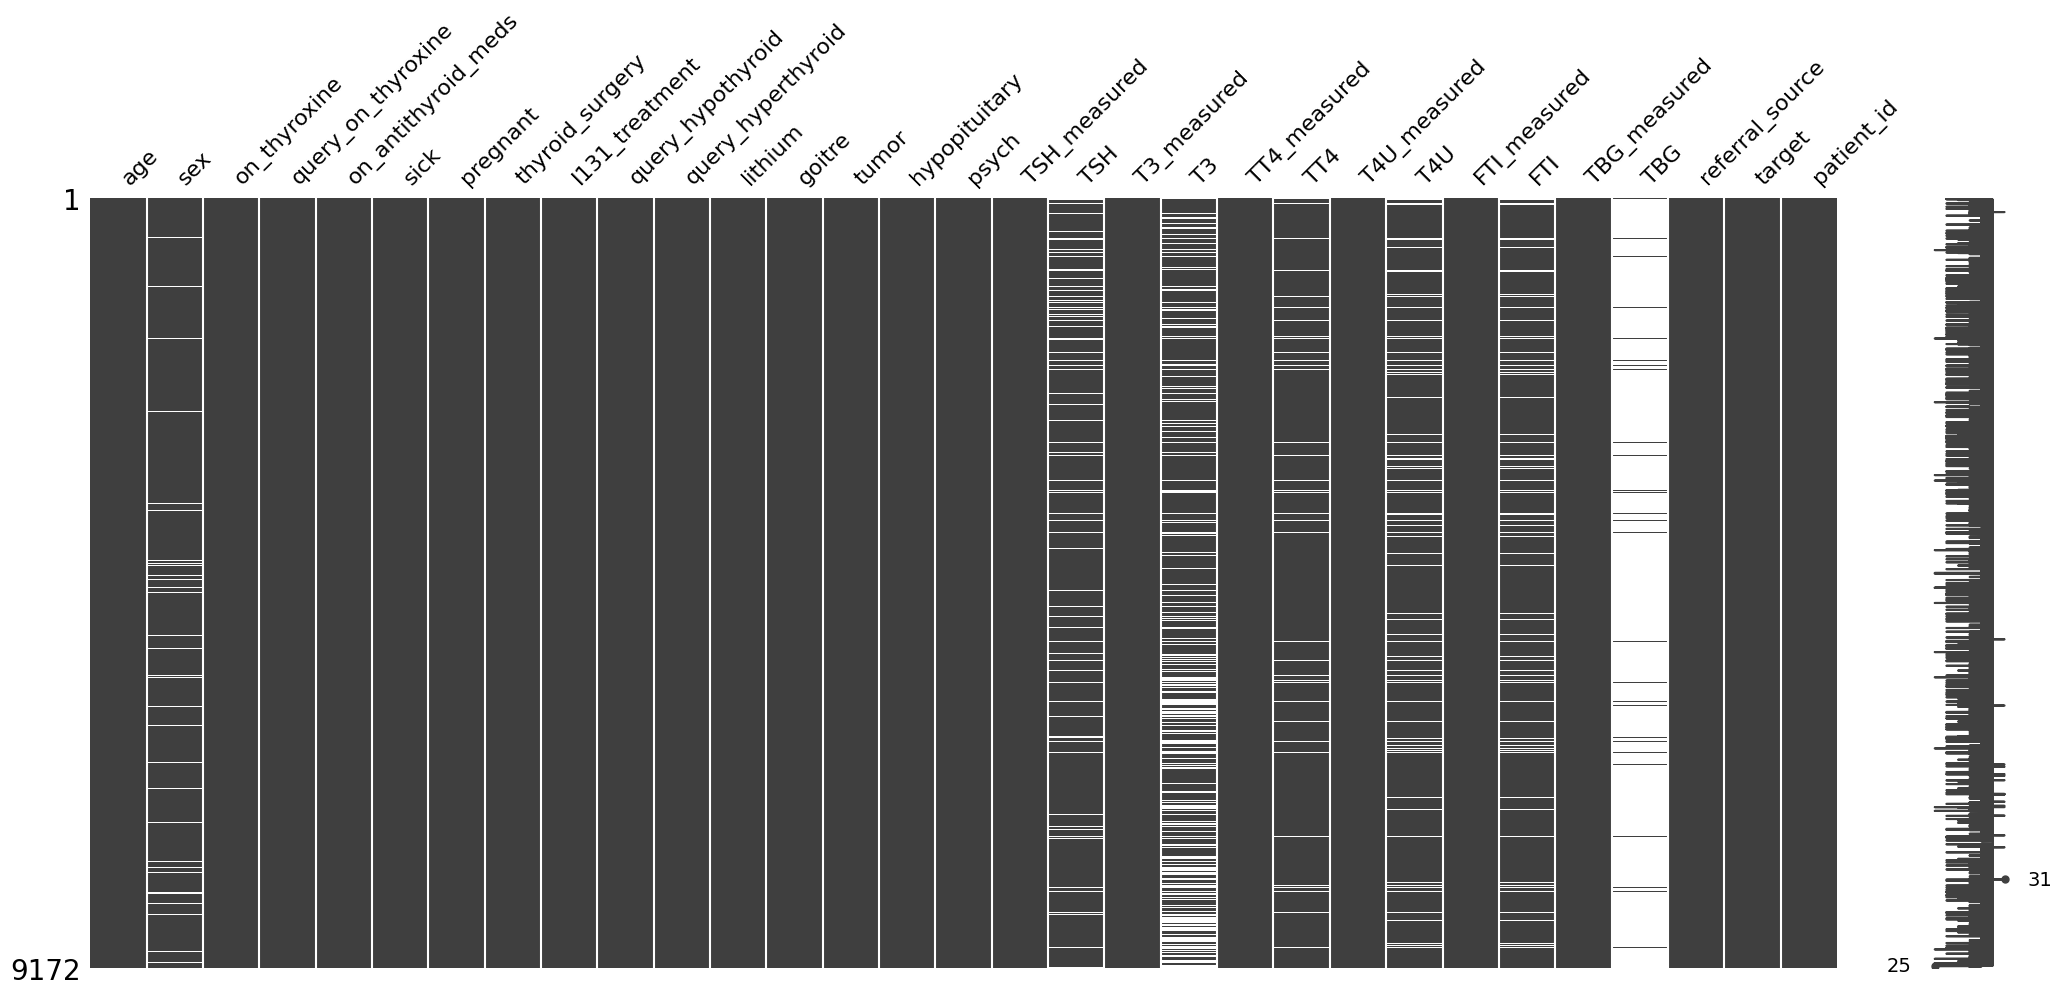

In [ ]:
import missingno as m        #check the missing value by graphical
m.matrix(th)

In [ ]:
th.isnull().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64

In [ ]:
#handle missing values
th.fillna(th.mode().iloc[0], inplace=True)
th['TBG'].fillna(th['TBG'].mean(), inplace=True)

In [ ]:
#convert object into int values
mappings = {
    'sex': {'M': 1, 'F': 0},
    'on_thyroxine': {'f': 1, 't': 0},
    'query_on_thyroxine': {'f': 1, 't': 0},
    'on_antithyroid_meds': {'f': 1, 't': 0},
    'goitre': {'f': 1, 't': 0},
    'tumor': {'f': 1, 't': 0},
    'hypopituitary': {'f': 1, 't': 0},
    'psych': {'f': 1, 't': 0},
    'TSH_measured': {'f': 1, 't': 0},
    'T3_measured': {'f': 1, 't': 0},
    'TT4_measured': {'f': 1, 't': 0},
    'T4U_measured': {'f': 1, 't': 0},
    'FTI_measured': {'f': 1, 't': 0},
    'TBG_measured': {'f': 1, 't': 0},
    'sick': {'f': 1, 't': 0},
    'pregnant': {'f': 1, 't': 0},
    'thyroid_surgery': {'f': 1, 't': 0},
    'I131_treatment': {'f': 1, 't': 0},
    'query_hypothyroid': {'f': 1, 't': 0},
    'query_hyperthyroid': {'f': 1, 't': 0},
    'referral_source': {'other': 0, 'SVI': 1, 'SVHC':2,'STMW':3, 'SVHD':4, 'WEST':5},
    'lithium': {'f': 1, 't': 0},
    'target': {
        '-': 0, 'S': 1, 'F': 2, 'AK': 3, 'R': 4, 'I': 5, 'M': 6, 'N': 7, 'G': 8, 'K': 9, 'A': 10, 'KJ': 11,
        'L': 12, 'MK': 13, 'Q': 14, 'J': 15, 'C|I': 16, 'O': 17, 'LJ': 18, 'H|K': 19, 'D': 20, 'GK': 21, 'MI': 22,
        'P': 23, 'FK': 24, 'B': 25, 'GI': 26, 'C': 27, 'GKJ': 28, 'OI': 29, 'D|R': 30, 'E': 31
    }
}

for column, mapping in mappings.items():
    th[column] = th[column].map(mapping)


In [ ]:
print(th.isnull().sum())

age                    0
sex                    0
on_thyroxine           0
query_on_thyroxine     0
on_antithyroid_meds    0
sick                   0
pregnant               0
thyroid_surgery        0
I131_treatment         0
query_hypothyroid      0
query_hyperthyroid     0
lithium                0
goitre                 0
tumor                  0
hypopituitary          0
psych                  0
TSH_measured           0
TSH                    0
T3_measured            0
T3                     0
TT4_measured           0
TT4                    0
T4U_measured           0
T4U                    0
FTI_measured           0
FTI                    0
TBG_measured           0
TBG                    0
referral_source        0
target                 0
patient_id             0
dtype: int64


In [ ]:
th.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,0,1,1,1,1,1,1,1,0,...,101.0,1,0.96,1,107.0,1,24.0,0,0,840801013
1,29,0,1,1,1,1,1,1,1,1,...,128.0,1,0.96,1,107.0,1,24.0,0,0,840801014
2,41,0,1,1,1,1,1,1,1,1,...,101.0,1,0.96,1,107.0,0,11.0,0,0,840801042
3,36,0,1,1,1,1,1,1,1,1,...,101.0,1,0.96,1,107.0,0,26.0,0,0,840803046
4,32,0,1,1,1,1,1,1,1,1,...,101.0,1,0.96,1,107.0,0,36.0,0,1,840803047


In [ ]:
print(th.duplicated().sum())

0


<Axes: >

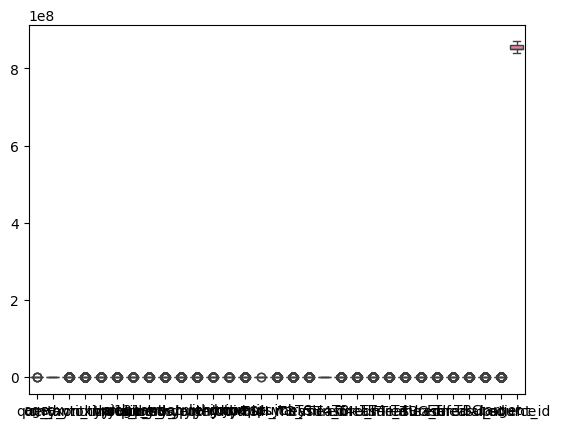

In [ ]:
sns.boxplot(th)

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# # Convert 'age' column to integer
# th['age'] = th['age'].astype(int)

# # List of columns to be transformed
# columns_to_encode = [
#     'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sex',
#     'pregnant', 'sick', 'thyroid_surgery', 'I131_treatment',
#     'query_hypothyroid', 'TBG_measured', 'T3_measured', 'FTI_measured',
#     'referral_source', 'T4U_measured','target'
# ]

# # Initialize LabelEncoder
# label_encoder = LabelEncoder()

# # Apply LabelEncoder to each column in the list
# for col in columns_to_encode:
#     th[col] = label_encoder.fit_transform(th[col])

# print(th)


In [ ]:
#detect outlier
th.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
count,9172.000000,9172.000000,9172.000000,9172.000000,9172.000000,9172.000000,9172.000000,9172.000000,9172.000000,9172.000000,...,9172.000000,9172.000000,9172.000000,9172.000000,9172.000000,9172.000000,9172.000000,9172.000000,9172.000000,9.172000e+03
mean,73.555822,0.304405,0.864806,0.983319,0.987353,0.962495,0.988334,0.985390,0.981574,0.931313,...,108.329226,0.088203,0.974640,0.087440,113.060078,0.961949,24.223359,0.585478,2.007959,8.529473e+08
std,1183.976718,0.460180,0.341949,0.128081,0.111752,0.190007,0.107383,0.119991,0.134492,0.252935,...,36.644427,0.283606,0.191373,0.282494,39.737560,0.191329,4.257227,0.847040,4.159302,7.581969e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.170000,0.000000,1.400000,0.000000,0.100000,0.000000,0.000000,8.408010e+08
25%,37.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,88.000000,0.000000,0.870000,0.000000,95.000000,1.000000,24.000000,0.000000,0.000000,8.504090e+08
50%,55.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,103.000000,0.000000,0.960000,0.000000,107.000000,1.000000,24.000000,0.000000,0.000000,8.510040e+08
75%,68.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,124.000000,0.000000,1.050000,0.000000,126.000000,1.000000,24.000000,1.000000,2.000000,8.607110e+08
max,65526.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,600.000000,1.000000,2.330000,1.000000,881.000000,1.000000,200.000000,5.000000,31.000000,8.701190e+08


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'on_thyroxine'}>,
        <Axes: title={'center': 'query_on_thyroxine'}>,
        <Axes: title={'center': 'on_antithyroid_meds'}>,
        <Axes: title={'center': 'sick'}>],
       [<Axes: title={'center': 'pregnant'}>,
        <Axes: title={'center': 'thyroid_surgery'}>,
        <Axes: title={'center': 'I131_treatment'}>,
        <Axes: title={'center': 'query_hypothyroid'}>,
        <Axes: title={'center': 'query_hyperthyroid'}>,
        <Axes: title={'center': 'lithium'}>],
       [<Axes: title={'center': 'goitre'}>,
        <Axes: title={'center': 'tumor'}>,
        <Axes: title={'center': 'hypopituitary'}>,
        <Axes: title={'center': 'psych'}>,
        <Axes: title={'center': 'TSH_measured'}>,
        <Axes: title={'center': 'TSH'}>],
       [<Axes: title={'center': 'T3_measured'}>,
        <Axes: title={'center': 'T3'}>,
        <Axes: title={'center': 'TT4_measured'}>,


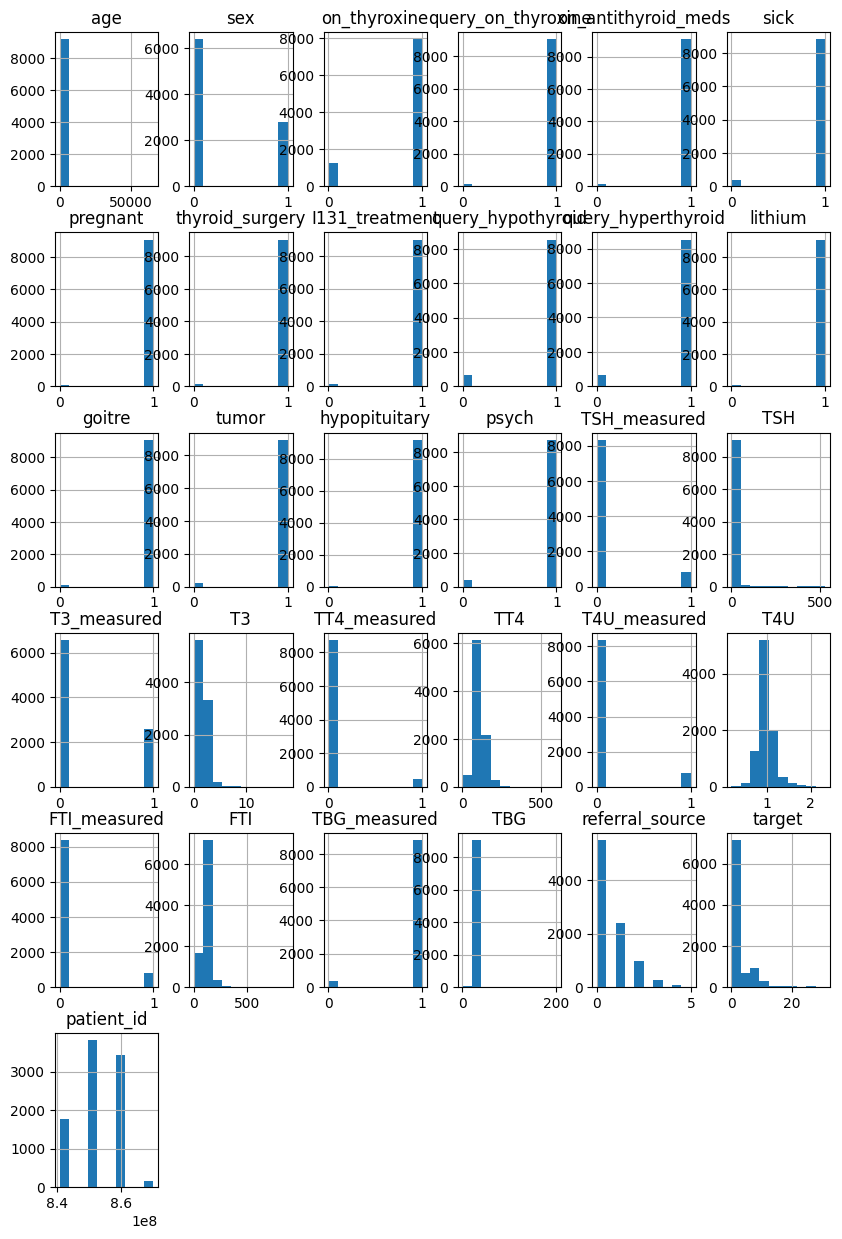

In [ ]:
th.hist(figsize=(10,15))

<Axes: title={'center': 'Correlation with target'}>

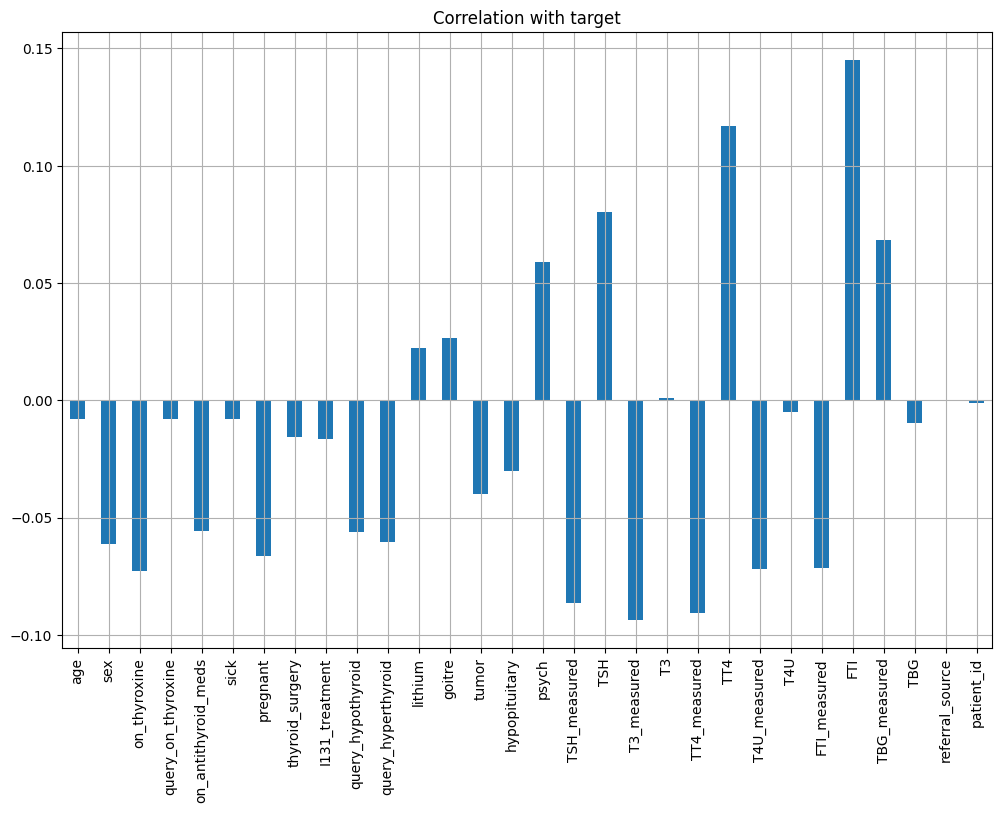

In [ ]:
th.drop('target',axis=1).corrwith(th['target']).plot(kind='bar',grid=True,figsize=(12,8),title="Correlation with target")

In [ ]:
#outlier
import numpy as np

def find_outliers(th):
  q1 = np.percentile(th, 25)
  q3 = np.percentile(th, 75)
  iqr = q3 - q1
  lower = q1 - (1.5 * iqr)
  upper = q3 + (1.5 * iqr)

  outliers = th[(th < lower) | (th > upper)]
  return outliers

In [ ]:
print("Number of outliers: ",len(find_outliers(th)))

Number of outliers:  9172


In [ ]:
th.drop(['patient_id','T3','T4U'],axis=1)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3_measured,TT4_measured,TT4,T4U_measured,FTI_measured,FTI,TBG_measured,TBG,referral_source,target
0,29,0,1,1,1,1,1,1,1,0,...,1,1,101.0,1,1,107.0,1,24.0,0,0
1,29,0,1,1,1,1,1,1,1,1,...,0,0,128.0,1,1,107.0,1,24.0,0,0
2,41,0,1,1,1,1,1,1,1,1,...,1,1,101.0,1,1,107.0,0,11.0,0,0
3,36,0,1,1,1,1,1,1,1,1,...,1,1,101.0,1,1,107.0,0,26.0,0,0
4,32,0,1,1,1,1,1,1,1,1,...,1,1,101.0,1,1,107.0,0,36.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,1,1,1,1,1,1,1,1,1,...,1,0,64.0,0,0,77.0,1,24.0,1,0
9168,22,1,1,1,1,1,1,1,1,1,...,1,0,91.0,0,0,99.0,1,24.0,1,0
9169,69,1,1,1,1,1,1,1,1,1,...,1,0,113.0,0,0,89.0,1,24.0,1,5
9170,47,0,1,1,1,1,1,1,1,1,...,1,0,75.0,0,0,88.0,1,24.0,0,0


In [ ]:
x=th.drop('target',axis=1)
y=th['target']

In [ ]:
x.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'patient_id'],
      dtype='object')

In [ ]:
x.shape

(9172, 30)

In [ ]:
 #Create a new category for missing target values
th['target_with_missing'] = th['target'].fillna('Missing')

In [ ]:
y=th['target']
print(y)

0       0
1       0
2       0
3       0
4       1
       ..
9167    0
9168    0
9169    5
9170    0
9171    0
Name: target, Length: 9172, dtype: int64


In [ ]:
#split of dataset
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

In [ ]:
print(x_train)

      age  sex  on_thyroxine  query_on_thyroxine  on_antithyroid_meds  sick  \
779    55    1             1                   1                    1     1   
6112   45    0             1                   1                    1     1   
6359   78    0             1                   1                    1     1   
4853   77    1             1                   1                    1     1   
4454   65    1             1                   1                    1     1   
...   ...  ...           ...                 ...                  ...   ...   
4373   26    1             1                   1                    1     1   
7891   62    0             0                   1                    1     1   
4859   84    0             1                   1                    1     1   
3264   73    0             1                   1                    1     1   
2732   36    0             1                   1                    1     1   

      pregnant  thyroid_surgery  I131_treatment  qu

In [ ]:
print(x_test)

      age  sex  on_thyroxine  query_on_thyroxine  on_antithyroid_meds  sick  \
4074   53    0             1                   1                    1     1   
1607   21    1             1                   1                    1     1   
4220   24    0             1                   1                    1     1   
8569   69    1             1                   1                    1     1   
7069   54    0             0                   1                    0     1   
...   ...  ...           ...                 ...                  ...   ...   
4603   51    0             1                   1                    1     1   
6464   66    0             1                   1                    1     1   
5356   70    1             0                   1                    1     1   
2749   48    0             1                   1                    1     1   
8230   41    0             1                   1                    1     1   

      pregnant  thyroid_surgery  I131_treatment  qu

In [ ]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred=lg.predict(x_test)
y_pred_train=lg.predict(x_train)
#Accuracy with Logistic Regression
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred))

0.7392779258541313
0.7287581699346405


In [ ]:
# Decision Tree algorithm
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_train_p=dt.predict(x_train)
y_predict=dt.predict(x_test)
print(accuracy_score(y_train,y_train_p))
print(accuracy_score(y_test,y_predict))

1.0
0.9596949891067538


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_train_p=rf.predict(x_train)
y_predict=rf.predict(x_test)
print(accuracy_score(y_train,y_train_p))
print(accuracy_score(y_test,y_predict))

1.0
0.9607843137254902
